In [22]:
# 5.7 Training an MNIST model with an incorrectly high learning rate
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60_000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 666.1230 - accuracy: 0.3276 - val_loss: 2.2500 - val_accuracy: 0.2067
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 3.0063 - accuracy: 0.2169 - val_loss: 2.2553 - val_accuracy: 0.1843
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3811 - accuracy: 0.2007 - val_loss: 2.2876 - val_accuracy: 0.2038
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3539 - accuracy: 0.2055 - val_loss: 2.2983 - val_accuracy: 0.1650
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4712 - accuracy: 0.1824 - val_loss: 2.5121 - val_accuracy: 0.1478
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3215 - accuracy: 0.1898 - val_loss: 2.4299 - val_accuracy: 0.1071
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3242 - accuracy: 0.1758 - val_loss: 3.6715 - val_accuracy: 0.1447
Epoc

In [23]:
# 5.8 The same model with a more appropriate learning rate
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3746 - accuracy: 0.9088 - val_loss: 0.1448 - val_accuracy: 0.9586
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1251 - accuracy: 0.9651 - val_loss: 0.1351 - val_accuracy: 0.9671
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0956 - accuracy: 0.9742 - val_loss: 0.1140 - val_accuracy: 0.9707
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0778 - accuracy: 0.9792 - val_loss: 0.1512 - val_accuracy: 0.9712
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0653 - accuracy: 0.9832 - val_loss: 0.1691 - val_accuracy: 0.9693
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0568 - accuracy: 0.9855 - val_loss: 0.1846 - val_accuracy: 0.9723
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0572 - accuracy: 0.9866 - val_loss: 0.2047 - val_accuracy: 0.9727
Epoch 

In [24]:
# 5.9 A simple logistic regression on MNIST 
model = keras.Sequential([layers.Dense(10, activation="softmax")])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_small_model = model.fit(train_images, train_labels,
          epochs=20,
          batch_size=128,
          validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 1ms/step - loss: 0.6666 - accuracy: 0.8361 - val_loss: 0.3560 - val_accuracy: 0.9035
Epoch 2/20
375/375 [==============================] - 0s 631us/step - loss: 0.3500 - accuracy: 0.9037 - val_loss: 0.3081 - val_accuracy: 0.9132
Epoch 3/20
375/375 [==============================] - 0s 642us/step - loss: 0.3150 - accuracy: 0.9127 - val_loss: 0.2891 - val_accuracy: 0.9192
Epoch 4/20
375/375 [==============================] - 0s 640us/step - loss: 0.2991 - accuracy: 0.9163 - val_loss: 0.2800 - val_accuracy: 0.9220
Epoch 5/20
375/375 [==============================] - 0s 637us/step - loss: 0.2896 - accuracy: 0.9192 - val_loss: 0.2755 - val_accuracy: 0.9241
Epoch 6/20
375/375 [==============================] - 0s 632us/step - loss: 0.2834 - accuracy: 0.9206 - val_loss: 0.2708 - val_accuracy: 0.9250
Epoch 7/20
375/375 [==============================] - 0s 638us/step - loss: 0.2783 - accuracy: 0.9223 - val_loss: 0.2694 - val_accuracy: 0

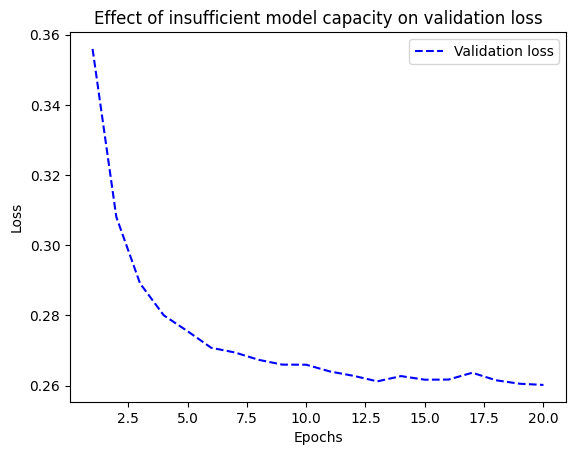

In [25]:
import matplotlib.pyplot as plt

def chart_val_loss(model_history, title=""):
    val_loss = model_history.history["val_loss"]
    epochs = range(1, 21)
    plt.plot(epochs, val_loss, "b--",
    label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

chart_val_loss(history_small_model, "Effect of insufficient model capacity on validation loss")

In [26]:
# 5.9 A simple logistic regression on MNIST 
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_small_model = model.fit(train_images, train_labels,
          epochs=20,
          batch_size=128,
          validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3541 - accuracy: 0.8992 - val_loss: 0.1763 - val_accuracy: 0.9488
Epoch 2/20
375/375 [==============================] - 0s 1ms/step - loss: 0.1601 - accuracy: 0.9525 - val_loss: 0.1350 - val_accuracy: 0.9607
Epoch 3/20
375/375 [==============================] - 0s 1ms/step - loss: 0.1112 - accuracy: 0.9667 - val_loss: 0.1241 - val_accuracy: 0.9651
Epoch 4/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0851 - accuracy: 0.9743 - val_loss: 0.1019 - val_accuracy: 0.9690
Epoch 5/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0685 - accuracy: 0.9788 - val_loss: 0.0886 - val_accuracy: 0.9743
Epoch 6/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0554 - accuracy: 0.9827 - val_loss: 0.0912 - val_accuracy: 0.9741
Epoch 7/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0447 - accuracy: 0.9867 - val_loss: 0.1148 - val_accuracy: 0.9675
Epoch 

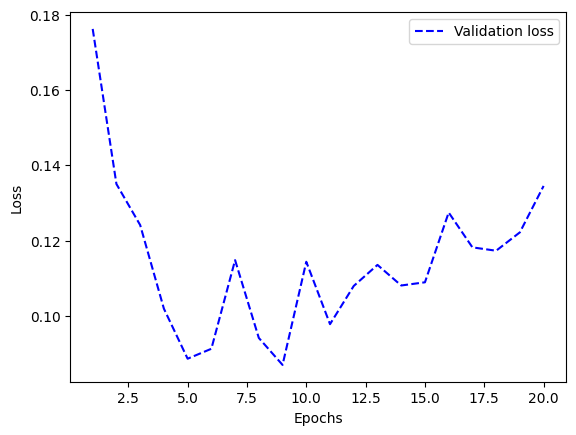

In [27]:
chart_val_loss(history_small_model)